# TALLER2
# ANDRES MAURICIO MONROY CARDONA ammonroy@gmail.com
# INICIA EN LA LINEA 16

In [1]:
#cargue librerias
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from matplotlib import  pyplot
import matplotlib.gridspec as gridspec
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns


In [2]:
#lectura archivo
TRAIN_BASE = pd.read_csv("c:/Users/ammon/MACHINE LEARNING/Taller1/train.csv")

In [3]:
# Agrupar las columnas por tipo de datos para realizar limpieza por grupo
tipos = TRAIN_BASE.columns.to_series().groupby(TRAIN_BASE.dtypes).groups
ctext = tipos[np.dtype('object')]
len(ctext)


43

In [4]:
cint = tipos[np.dtype('int64')]
len(cint)


35

In [5]:
cfloat = tipos[np.dtype('float64')]
len(cfloat)

3

Segun el analisis realizado para los campos nulos (el inmueble no tiene esa caracteristica) vamos a llenar con NO para los campos de texto (43 campos) y 0 para los numericos (35 campos) y decimales (3 campos)


In [6]:
# Completando valores faltantas datos de texto con la palabra NO
for i in ctext:
    TRAIN_BASE[i] = TRAIN_BASE[i].fillna('NO')

In [7]:
# Completando valores faltantas datos Numericos con 0
for j in cint:
    TRAIN_BASE[j] = TRAIN_BASE[j].fillna(0)

In [8]:
# Completando valores faltantas datos Decimales con 0
for k in cfloat:
    TRAIN_BASE[k] = TRAIN_BASE[k].fillna(0)

In [9]:
# Comprobamos nuevamente si existen nulos
TRAIN_BASE.isnull().any().any()

False

In [10]:
#CALCULO DE LA CORRELACION
TRAIN_BASE.corr(method="pearson")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.019761,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.019761,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,...,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,0.209624
LotArea,-0.033226,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


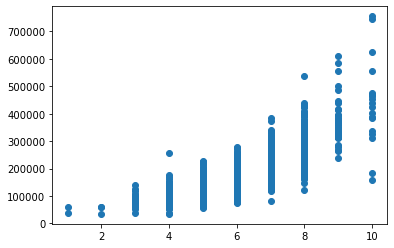

In [11]:
pyplot.scatter(TRAIN_BASE["OverallQual"], TRAIN_BASE["SalePrice"])

Se puede observar que entre mayor sea el OverallQual tiende a tener un mayor precio de venta SalePrice

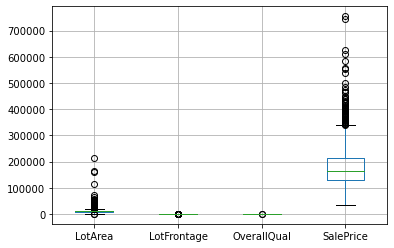

In [12]:
boxplot = TRAIN_BASE.boxplot(column=["LotArea","LotFrontage","OverallQual","SalePrice"])

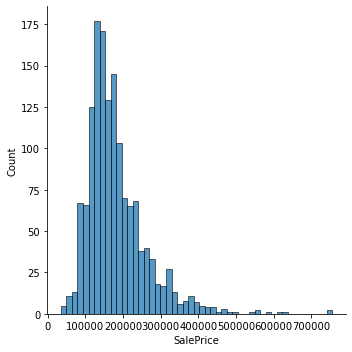

In [13]:
sns.displot(TRAIN_BASE['SalePrice'])

Se puede observar que la mayor cantidad de inmuebles se venden entre 100000 y 200000

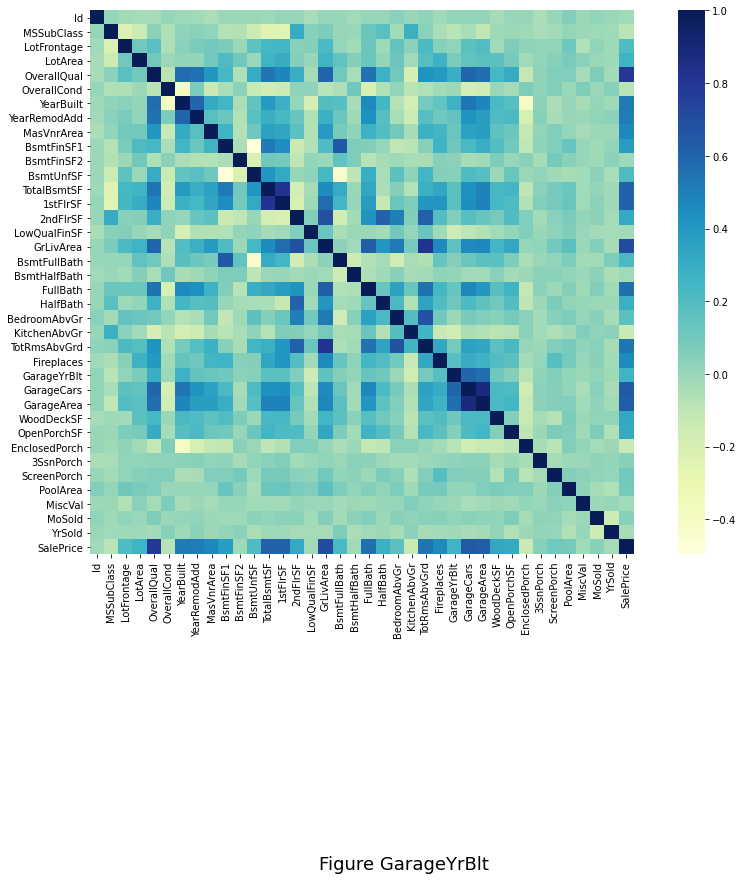

In [14]:
h=1
corrmat = TRAIN_BASE.corr()
f, ax = pyplot.subplots(figsize=(16, 10))
heatm = sns.heatmap(corrmat, vmax=1, square=True, cmap = 'YlGnBu');
heatm.text(16, 60, 'Figure {}'.format(k),fontsize=18)
h=h+1

Se observa una correlacion mayor del precio de venta con OverallQual, GarageCars, GarageArea, GrLivArea

In [15]:
X = TRAIN_BASE[["GarageCars","GarageArea","OverallQual","GrLivArea"]] 
Y = TRAIN_BASE["SalePrice"]
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()

predictions = model.predict(X)  

print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     1045.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:46:45   Log-Likelihood:                -17556.
No. Observations:                1460   AIC:                         3.512e+04
Df Residuals:                    1455   BIC:                         3.515e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.844e+04   4820.467    -20.420      

Se puede concluir que el precio de venta influyo mayormente "GarageCars","GarageArea","OverallQual","GrLivArea"

# INICIO TALLER 2

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import Image as PImage
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

#### Se crea la variable binaria en donde 1 sea SalePrice mayor a 214000.000000 y 0 SalePrice Menor a 214000.000000.

In [17]:
TRAIN_BASE.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [18]:
TRAIN_BASE["VariableBinariaSales"]=np.where(TRAIN_BASE["SalePrice"]>214000.000000 , 1, 0)

In [19]:
TRAIN_BASE["VariableBinariaSales"].head()

0    0
1    0
2    1
3    0
4    1
Name: VariableBinariaSales, dtype: int32

#### Definir las variables a usar en el modelo - se usaran las que segun el analisis anterior tenian mayor correlacion

In [20]:
TRAIN_BASE_TREE=TRAIN_BASE[["GarageCars","OverallQual","GrLivArea","VariableBinariaSales"]]

## ARBOL DE DECISION

In [21]:
y_train = TRAIN_BASE_TREE['VariableBinariaSales'].astype("int")
x_train = TRAIN_BASE_TREE[["GarageCars","OverallQual","GrLivArea"]]

### Funcion de calidad de medicion:  Entropy

In [22]:
decision_tree = DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4)
arbol = decision_tree.fit(x_train, y_train)


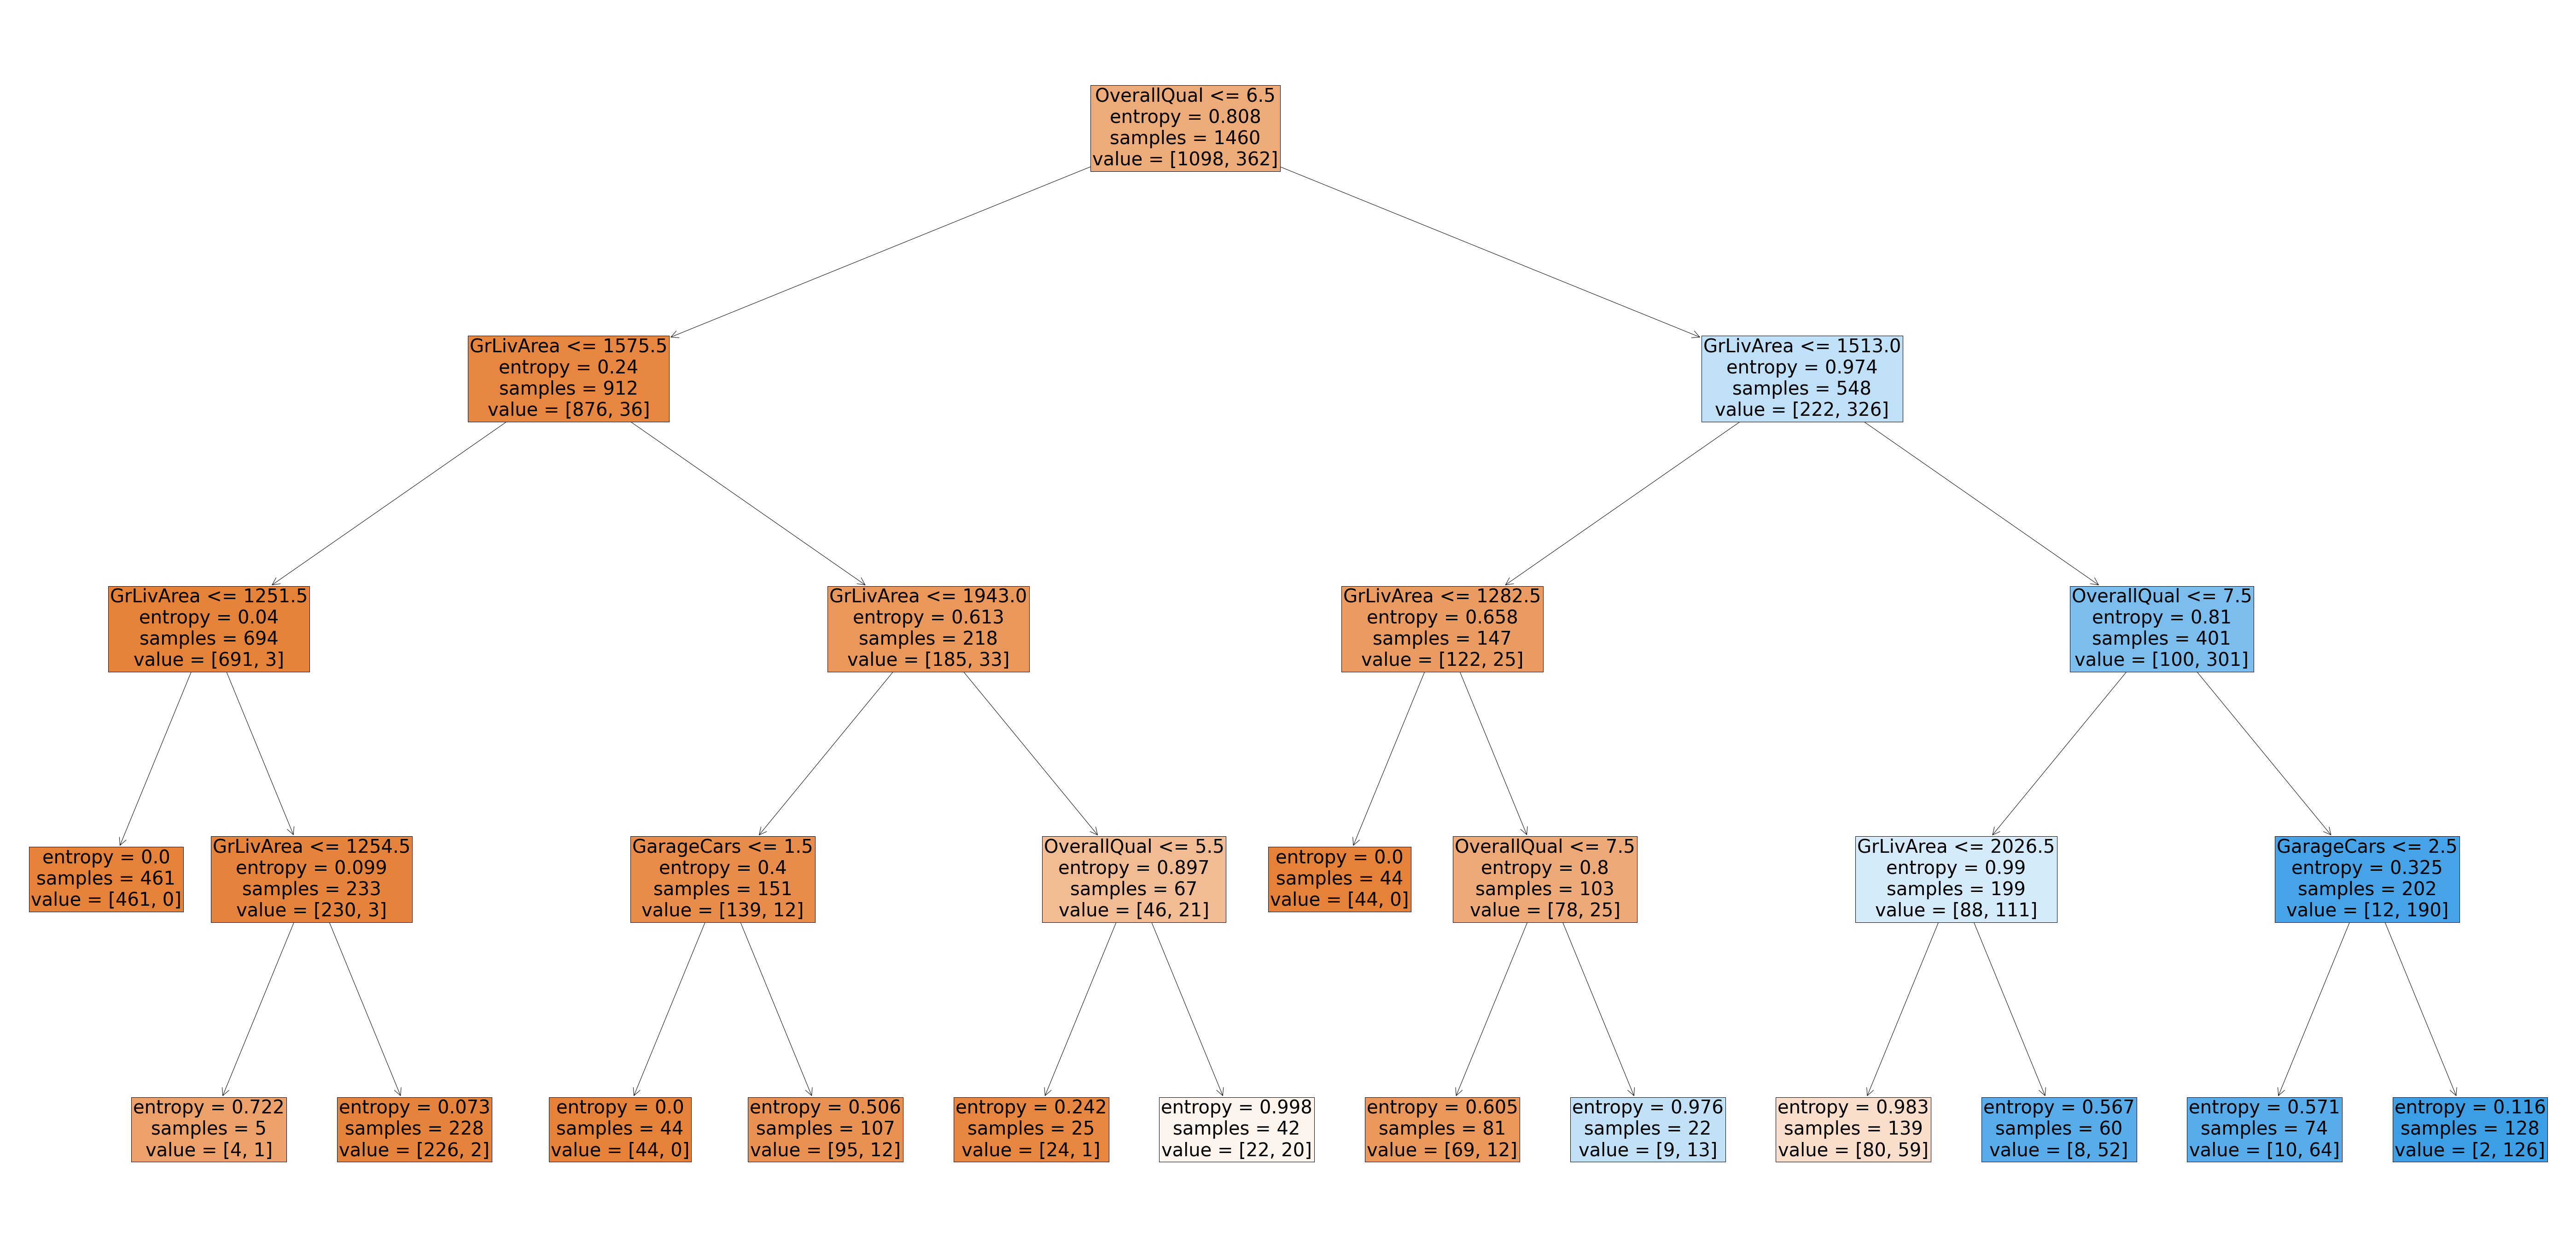

In [35]:
tree.plot_tree(arbol, filled=1,fontsize=40,feature_names=("GarageCars","OverallQual","GrLivArea"))
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

#### Segun el modelo de Arbol de Decision por la funcion de medicion de calidad entropia se puede encontrar lo siguiente:


- La primera variable que usa en el primer nivel de decision es "OverallQual" (Calidad General del inmueble), si la calificacion es mayor a 6.5 es probable que el inmueble valga mas del valor de corte (214000)


- En el siguiente nivel toma como referencia en la mayoria de las hojas la variable "GrLivArea" (Area Habitable), por ejemplo para la rama izquierda si es menor o igual a 1575.5 es menos probable que el inmueble valga menos de 214000  


- En el tercer nivel en algunas hojas toma la decision por la variable "GarageCars" (Carros en Garage), por ejemplo en el extremo derecho se puede observar que si el garage tiene capacidad de mas de 2.5 carros la probabilidad de que valga el inmueble mas de 214000 es aun mayor


- Por lo tanto segun este modelo de arbol de decision la jerarquia de decision viene dada principalmente si a mayor "OverallQual",  "GrLivArea" y "GarageCars"  mayor es la probabilidad de que el inmueble valga mas de 214000




In [24]:
confusion_matrix(y_train, arbol.predict(x_train))

array([[1069,   29],
       [ 107,  255]], dtype=int64)

### Accuracy 

In [25]:
(954+339) / (954+23+144+339)

0.8856164383561644

### Especificidad 

In [26]:
(954) / (954+144)

0.8688524590163934

### Sensitividad 

In [27]:
(339) / (339+23)

0.93646408839779

### Valor predicitivo positivo (Recall)

In [28]:
339 / (339+144)

0.7018633540372671

### Valor predicitivo Negativo (Precision)

In [29]:
954 / (954+23)

0.9764585465711362

#### Al revisar la metricas de Accuracy, Especificidad, Sensitividad, Valor predicitivo positivo ( Recall) y Valor predicitivo Negativo ( Precision) se puede determinar que las variables son buenas para determinar el modelo por arbol de decision ya que se encuentran por encima del 70%

## Curva ROC

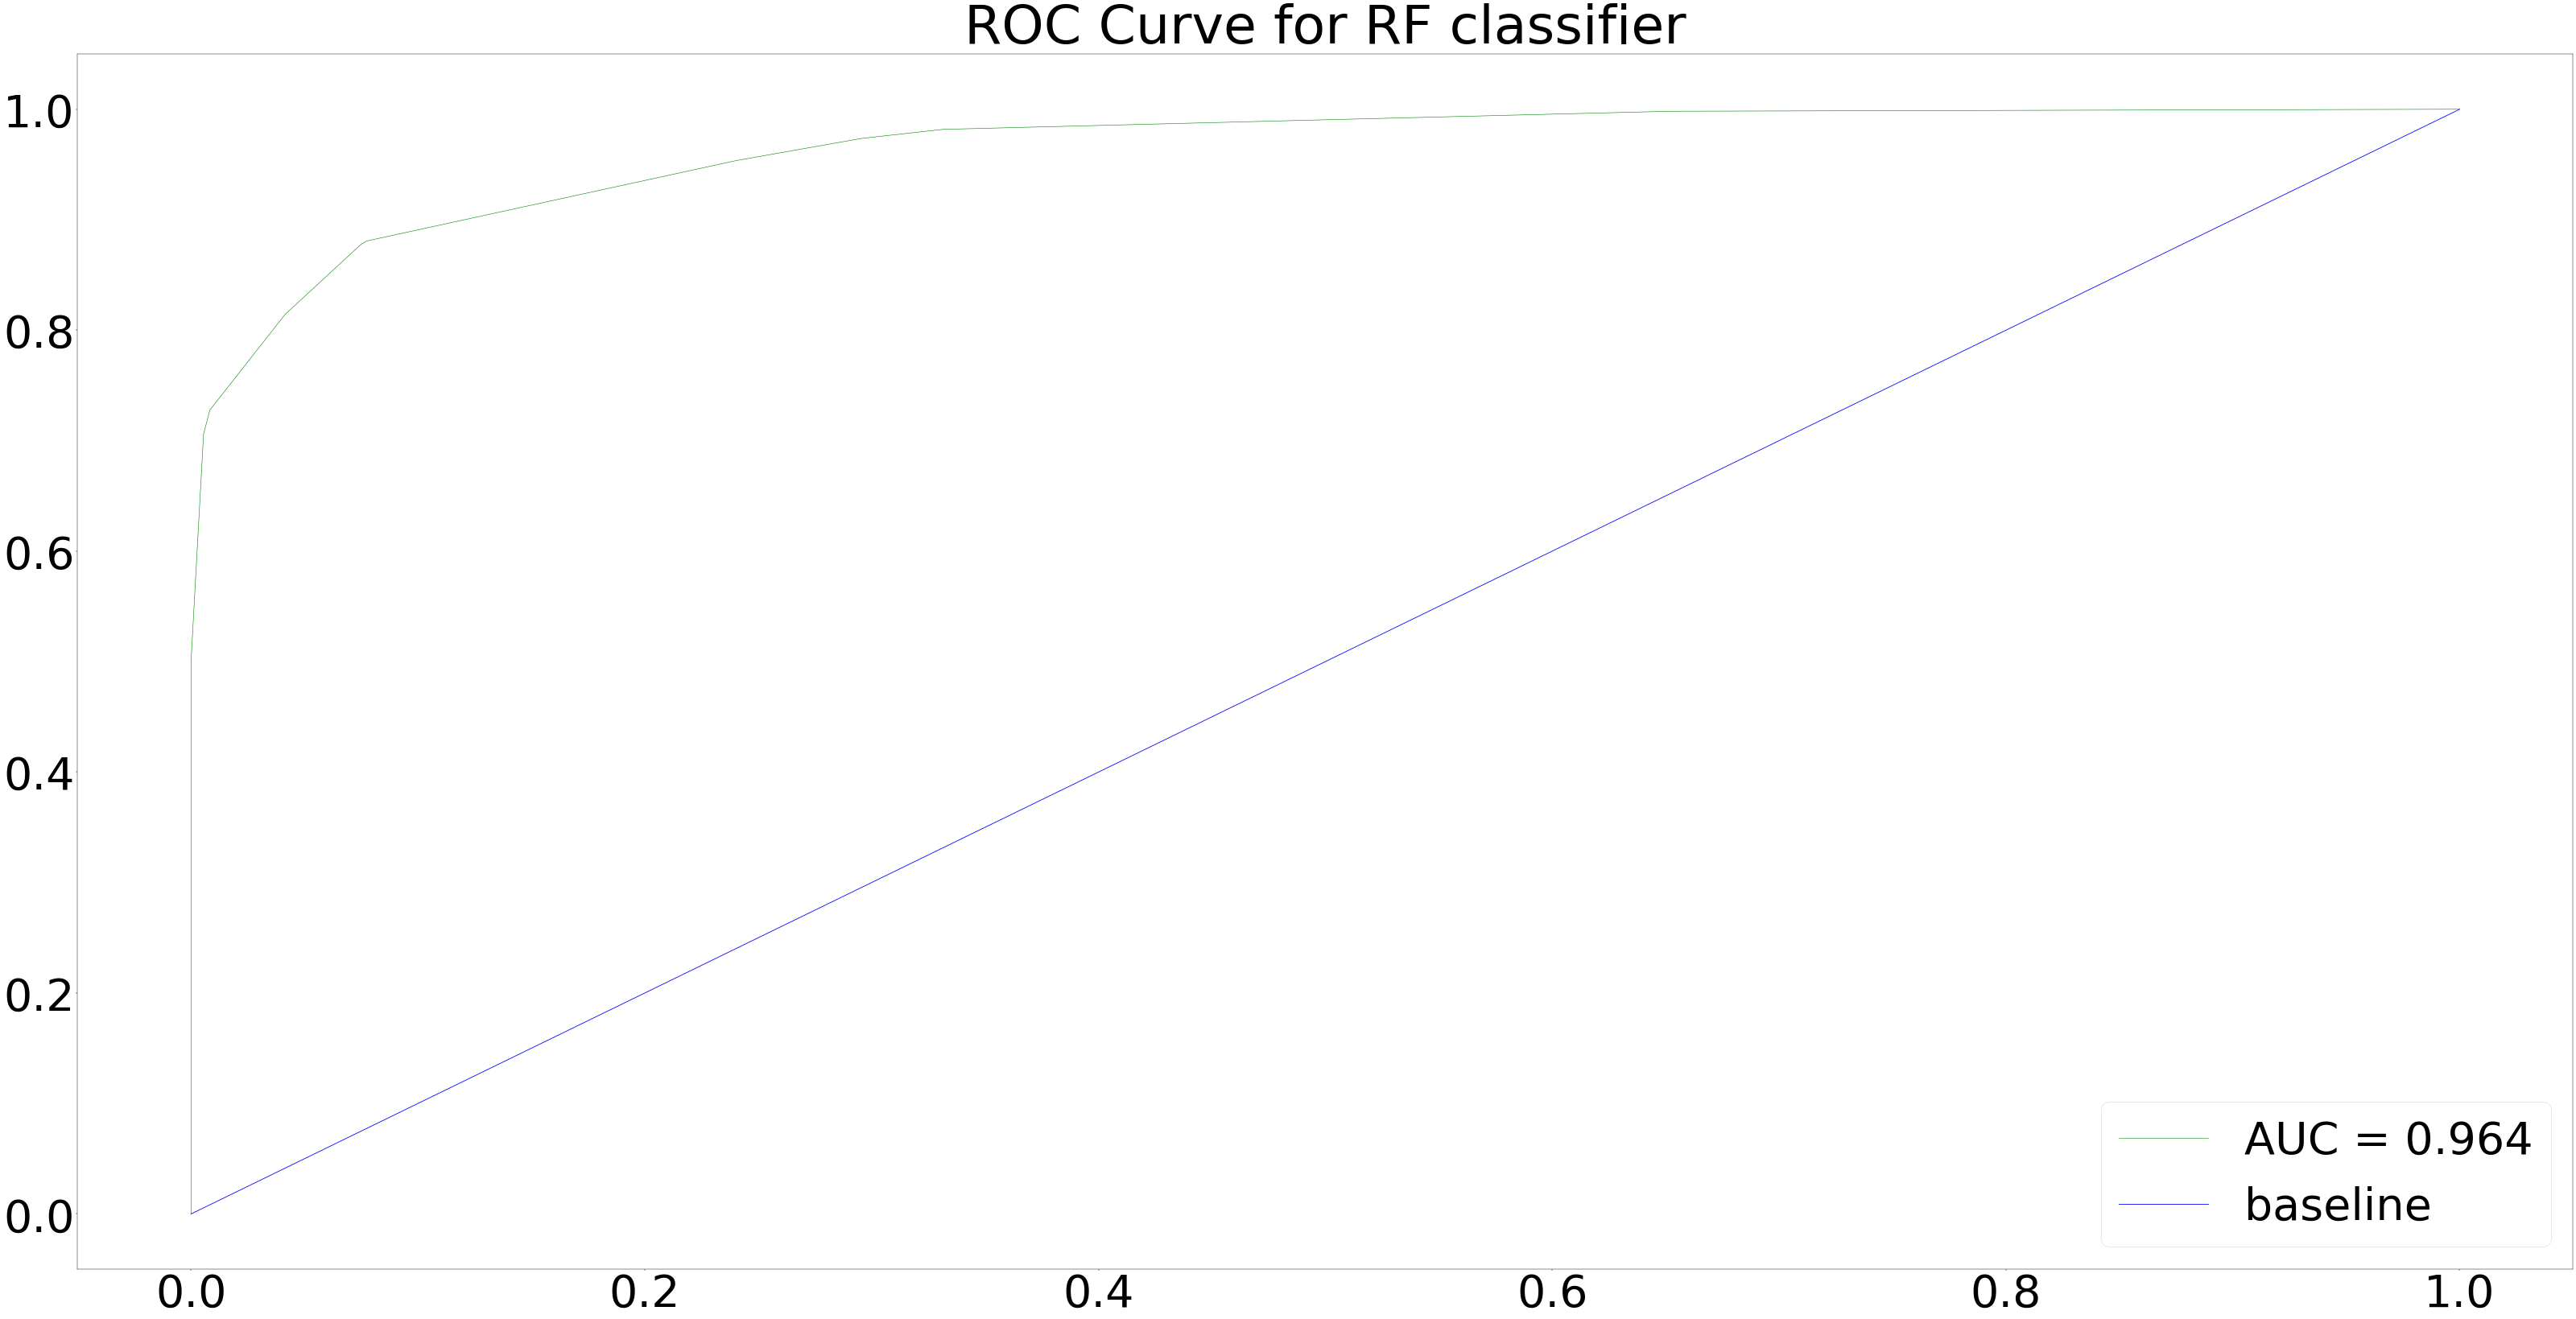

In [36]:
probas = arbol.predict_proba(x_train)
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_train, probas[:,0], pos_label=0)
base_fpr, base_tpr, _ = roc_curve(y_train, [1 for _ in range(len(y_train))])
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=40)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.rcParams['font.size'] = 100
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();

#### Analizando la metrica de la curva ROC nos indica que el performance es bueno ya que tiene un valor de AUC alto (0.964) por lo tanto podemos confiar en los resultados presentados en el modelo del arbol de decision

### Funcion de calidad de medicion: Gini

In [31]:
decision_tree1 = DecisionTreeClassifier(criterion='gini',
                                       min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4)
arbol1 = decision_tree1.fit(x_train, y_train)

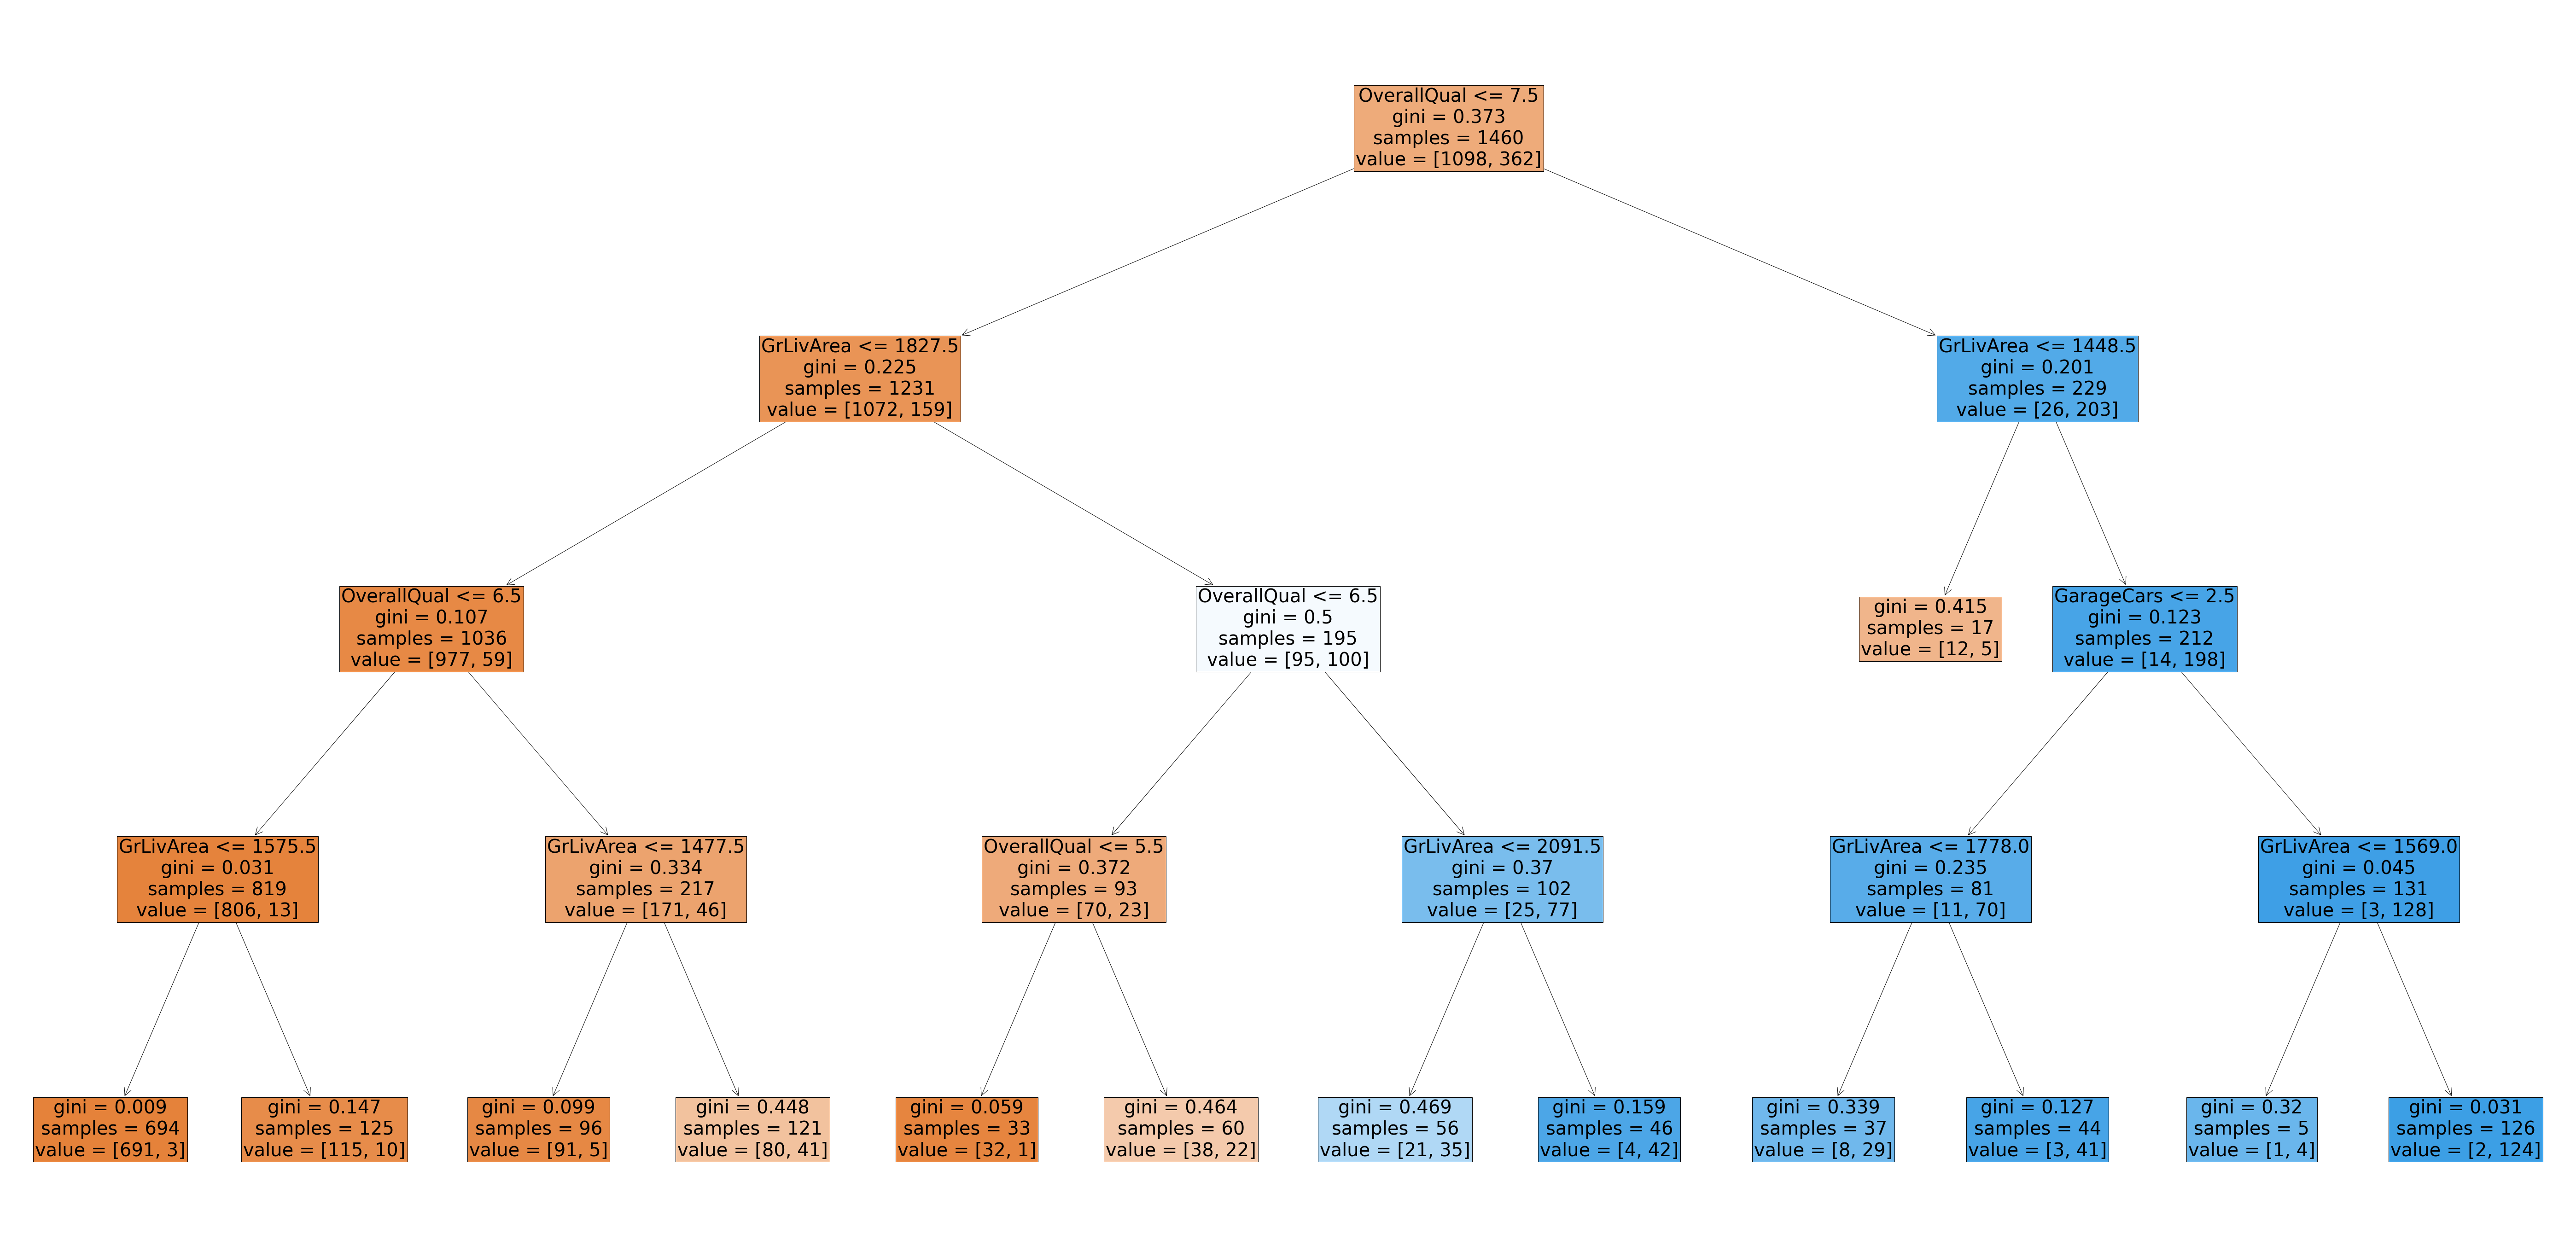

In [32]:
tree.plot_tree(arbol1, filled=1,fontsize=40,feature_names=("GarageCars","OverallQual","GrLivArea"))
plt.rcParams["figure.figsize"] = (100,50)
plt.show()

#### Segun el modelo de Arbol de Decision por la funcion de medicion de calidad gini se puede encontrar lo siguiente:


- La primera variable que usa en el primer nivel de decision es "OverallQual" (Calidad General del inmueble), si la calificacion es mayor a 7.5 es probable que el inmueble valga mas del valor de corte (214000)


- En el siguiente nivel toma como referencia en la mayoria de las hojas la variable "GrLivArea" (Area Habitable), por ejemplo para la rama izquierda si es menor o igual a 1827.5 es menos probable que el inmueble valga menos de 214000  


- En el tercer nivel en algunas hojas toma la decision por la variable "GarageCars" (Carros en Garage), por ejemplo en el extremo derecho se puede observar que si el garage tiene capacidad de mas de 2.5 carros la probabilidad de que valga el inmueble mas de 214000 es aun mayor


- En este modelo toma en el mismo orden la jerarquia de las variables pero el criterio es un poco mas exigente es decir que los valores para predecir que un inmueble valga mas de 214000 son mas altos


In [33]:
confusion_matrix(y_train, arbol1.predict(x_train))

array([[1059,   39],
       [  87,  275]], dtype=int64)

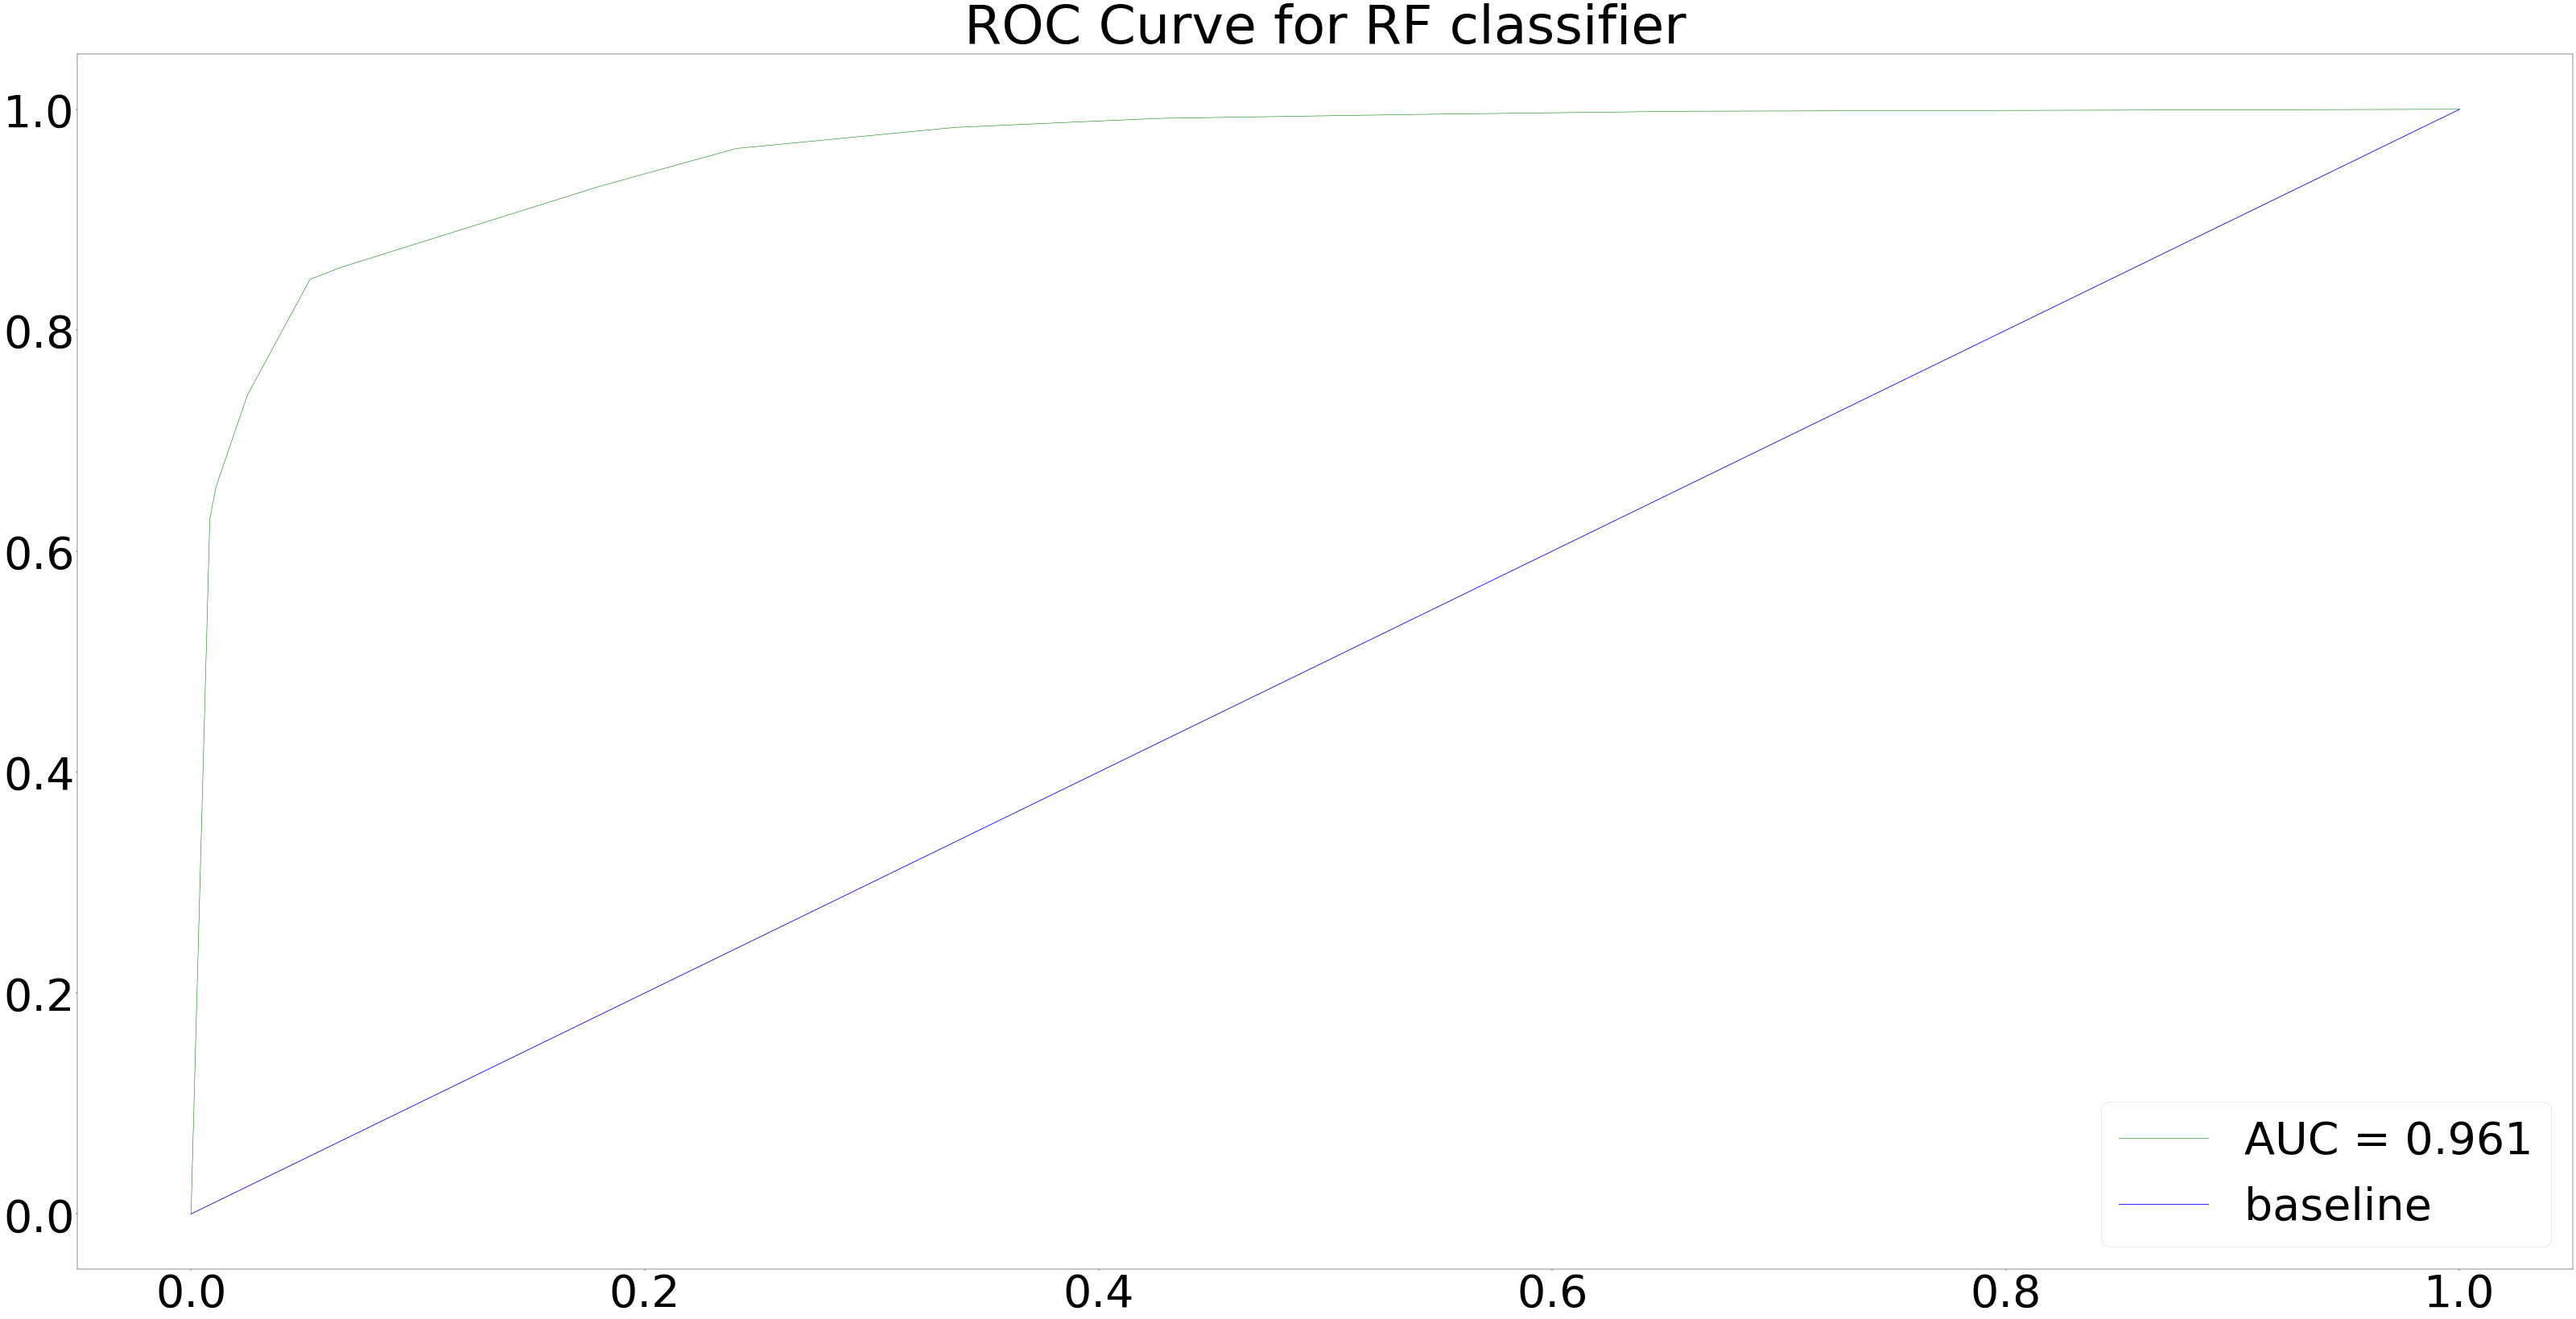

In [37]:
probas = arbol1.predict_proba(x_train)
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_train, probas[:,0], pos_label=0)
base_fpr, base_tpr, _ = roc_curve(y_train, [1 for _ in range(len(y_train))])
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=40)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.rcParams['font.size'] = 100
    # Plot both curves
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();

#### Analizando la metrica de la curva ROC nos indica que el performance es bueno ya que tiene un valor de AUC alto (0.961) por lo tanto podemos confiar en los resultados presentados en el modelo del arbol de decision